<a href="https://colab.research.google.com/github/Niharika626/Niharika626/blob/main/final(89)_code_xgboost_alg.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving Gait_Data___Arm_swing_13Apr2024.csv to Gait_Data___Arm_swing_13Apr2024.csv


Importing the necessary libraries

In [ ]:
#XGBoost
#importing the libraries
import numpy as np
import pandas as pd
import os,sys
from sklearn.preprocessing import MinMaxScaler
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix

In [ ]:
#Read the data
df = pd.read_csv('Gait_Data___Arm_swing_13Apr2024.csv')
df.head()

,PATNO,EVENT_ID,INFODT,COHORT,SP_U,RA_AMP_U,LA_AMP_U,RA_STD_U,LA_STD_U,SYM_U,...,TUG1_STRAIGHT_DUR,TUG1_TURNS_DUR,TUG1_STEP_REG,TUG1_STEP_SYM,TUG2_DUR,TUG2_STEP_NUM,TUG2_STRAIGHT_DUR,TUG2_TURNS_DUR,TUG2_STEP_REG,TUG2_STEP_SYM
0,42443,V06,11/2018,1.0,1.445,42.787289,31.405978,2.783204,2.597315,0.369588,...,0.554688,1.625000,0.612586,1.421568,10.390625,12.291016,0.546875,1.523438,0.565465,1.056312
1,42443,V04,11/2017,1.0,1.211,41.744432,42.194299,2.286481,2.235276,0.019062,...,0.507812,1.312500,0.605626,1.284985,9.437500,11.674805,0.523438,1.441406,0.744995,1.209420
2,42438,V06,10/2018,3.0,1.131,30.357805,42.788477,5.422287,5.012269,0.289054,...,0.593750,2.152344,0.741461,0.993754,13.781250,16.245117,0.554688,2.363281,0.713150,1.002639
3,42426,V06,12/2018,1.0,1.395,47.294965,34.610918,7.725009,7.838284,0.375873,...,0.632812,1.804688,0.575304,1.137755,8.820312,8.132812,0.593750,1.500000,0.548270,3.290938
4,42426,BL,11/2016,1.0,0.982,51.516231,30.989870,7.412588,4.762775,0.672047,...,0.632812,1.710938,0.509044,1.909214,8.609375,7.441406,0.640625,1.449219,0.667530,1.035053


In [ ]:
df

,PATNO,EVENT_ID,INFODT,COHORT,SP_U,RA_AMP_U,LA_AMP_U,RA_STD_U,LA_STD_U,SYM_U,...,TUG1_STRAIGHT_DUR,TUG1_TURNS_DUR,TUG1_STEP_REG,TUG1_STEP_SYM,TUG2_DUR,TUG2_STEP_NUM,TUG2_STRAIGHT_DUR,TUG2_TURNS_DUR,TUG2_STEP_REG,TUG2_STEP_SYM
0,42443,V06,11/2018,1.0,1.445,42.787289,31.405978,2.783204,2.597315,0.369588,...,0.554688,1.625000,0.612586,1.421568,10.390625,12.291016,0.546875,1.523438,0.565465,1.056312
1,42443,V04,11/2017,1.0,1.211,41.744432,42.194299,2.286481,2.235276,0.019062,...,0.507812,1.312500,0.605626,1.284985,9.437500,11.674805,0.523438,1.441406,0.744995,1.209420
2,42438,V06,10/2018,3.0,1.131,30.357805,42.788477,5.422287,5.012269,0.289054,...,0.593750,2.152344,0.741461,0.993754,13.781250,16.245117,0.554688,2.363281,0.713150,1.002639
3,42426,V06,12/2018,1.0,1.395,47.294965,34.610918,7.725009,7.838284,0.375873,...,0.632812,1.804688,0.575304,1.137755,8.820312,8.132812,0.593750,1.500000,0.548270,3.290938
4,42426,BL,11/2016,1.0,0.982,51.516231,30.989870,7.412588,4.762775,0.672047,...,0.632812,1.710938,0.509044,1.909214,8.609375,7.441406,0.640625,1.449219,0.667530,1.035053
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
187,60046,V12,05/2019,NaN,NaN,23.160092,27.543798,3.630631,3.522706,0.158126,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
188,60057,V12,04/2019,NaN,NaN,29.782323,41.685751,9.155024,18.263038,0.811041,...,0.601562,1.753906,0.641498,1.551368,9.789062,9.356445,0.585938,1.714844,0.638727,1.743030
189,60059,V12,05/2019,NaN,NaN,31.132878,33.728352,8.217441,3.558946,0.172383,...,0.554688,2.171875,0.384698,1.049300,11.156250,10.600586,0.570312,1.917969,0.532902,1.168936
190,60060,V12,04/2019,NaN,NaN,16.501651,10.129571,2.696206,3.546745,0.723158,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


from matplotlib import pyplot as plt
_df_0['PATNO'].plot(kind='hist', bins=20, title='PATNO')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_1['COHORT'].plot(kind='hist', bins=20, title='COHORT')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_2['SP_U'].plot(kind='hist', bins=20, title='SP_U')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_3['RA_AMP_U'].plot(kind='hist', bins=20, title='RA_AMP_U')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_4.plot(kind='scatter', x='PATNO', y='COHORT', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_5.plot(kind='scatter', x='COHORT', y='SP_U', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_6.plot(kind='scatter', x='SP_U', y='RA_AMP_U', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_7.plot(kind='scatter', x='RA_AMP_U', y='LA_AMP_U', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_8['PATNO'].plot(kind='line', figsize=(8, 4), title='PATNO')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_9['COHORT'].plot(kind='line', figsize=(8, 4), title='COHORT')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_10['SP_U'].plot(kind='line', figsize=(8, 4), title='SP_U')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_11['RA_AMP_U'].plot(kind='line', figsize=(8, 4), title='RA_AMP_U')
plt.gca().spines[['top', 'right']].set_visible(False)

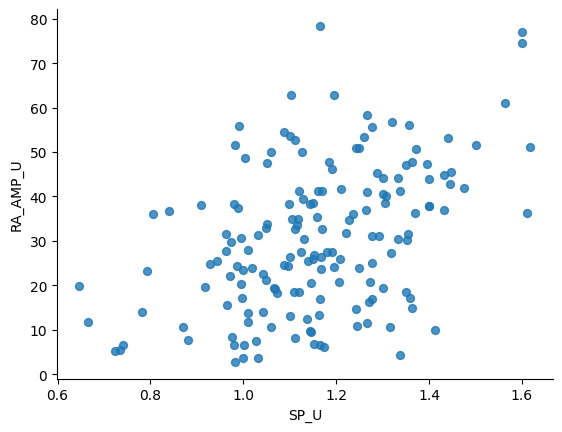

In [ ]:
from matplotlib import pyplot as plt
df.plot(kind='scatter', x='SP_U', y='RA_AMP_U', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

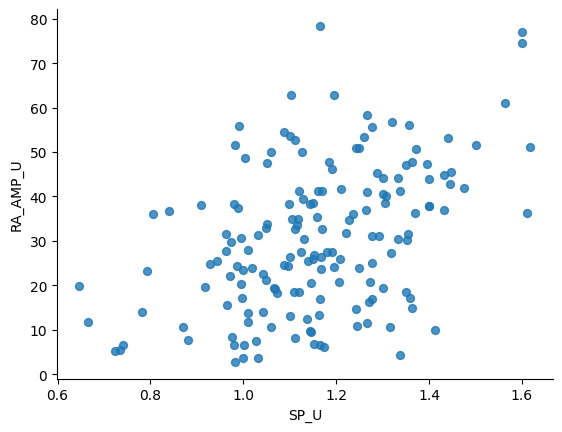

In [ ]:
from matplotlib import pyplot as plt
df.plot(kind='scatter', x='SP_U', y='RA_AMP_U', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

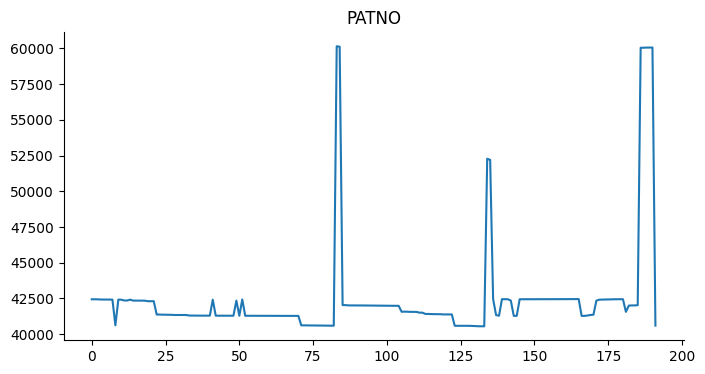

In [ ]:
from matplotlib import pyplot as plt
df['PATNO'].plot(kind='line', figsize=(8, 4), title='PATNO')
plt.gca().spines[['top', 'right']].set_visible(False)

In [ ]:
#checking the columns
df.columns

Index(['PATNO', 'EVENT_ID', 'INFODT', 'COHORT', 'SP_U', 'RA_AMP_U', 'LA_AMP_U',
       'RA_STD_U', 'LA_STD_U', 'SYM_U', 'R_JERK_U', 'L_JERK_U', 'ASA_U',
       'ASYM_IND_U', 'TRA_U', 'T_AMP_U', 'CAD_U', 'STR_T_U', 'STR_CV_U',
       'STEP_REG_U', 'STEP_SYM_U', 'JERK_T_U', 'SP__DT', 'RA_AMP_DT',
       'LA_AMP_DT', 'RA_STD_DT', 'LA_STD_DT', 'SYM_DT', 'R_JERK_DT',
       'L_JERK_DT', 'ASA_DT', 'ASYM_IND_DT', 'TRA_DT', 'T_AMP_DT', 'CAD_DT',
       'STR_T_DT', 'STR_CV_DT', 'STEP_REG_DT', 'STEP_SYM_DT', 'JERK_T_DT',
       'SW_VEL_OP', 'SW_PATH_OP', 'SW_FREQ_OP', 'SW_JERK_OP', 'SW_VEL_CL',
       'SW_PATH_CL', 'SW_FREQ_CL', 'SW_JERK_CL', 'TUG1_DUR', 'TUG1_STEP_NUM',
       'TUG1_STRAIGHT_DUR', 'TUG1_TURNS_DUR', 'TUG1_STEP_REG', 'TUG1_STEP_SYM',
       'TUG2_DUR', 'TUG2_STEP_NUM', 'TUG2_STRAIGHT_DUR', 'TUG2_TURNS_DUR',
       'TUG2_STEP_REG', 'TUG2_STEP_SYM'],
      dtype='object')

In [ ]:
#checking the null values
print(df.isnull().sum())

PATNO                 0
EVENT_ID             14
INFODT                0
COHORT               25
SP_U                 15
RA_AMP_U             13
LA_AMP_U             13
RA_STD_U             13
LA_STD_U             13
SYM_U                13
R_JERK_U             13
L_JERK_U             13
ASA_U                13
ASYM_IND_U           13
TRA_U                13
T_AMP_U              13
CAD_U                13
STR_T_U              13
STR_CV_U             13
STEP_REG_U           13
STEP_SYM_U           13
JERK_T_U             13
SP__DT               19
RA_AMP_DT            19
LA_AMP_DT            19
RA_STD_DT            19
LA_STD_DT            19
SYM_DT               19
R_JERK_DT            19
L_JERK_DT            19
ASA_DT               19
ASYM_IND_DT          19
TRA_DT               19
T_AMP_DT             19
CAD_DT               19
STR_T_DT             19
STR_CV_DT            19
STEP_REG_DT          19
STEP_SYM_DT          19
JERK_T_DT            19
SW_VEL_OP             9
SW_PATH_OP      

In [ ]:
"""# lasso regression for finding the important features
from sklearn.linear_model import Lasso

# Create a LASSO regression model
model = Lasso(alpha=0.1)

# Fit the model to the data
model.fit(X, y)

# Get the coefficients of the model
coefficients = model.coef_

# Create a list of features and their importance scores
feature_importance = sorted(zip(X.columns, coefficients), key=lambda x: abs(x[1]), reverse=True)

# Print the top 5 most important features
print(feature_importance[:15])"""
#important_features = ['COHORT','TUG1_DUR','TUG1_STEP_NUM','TUG1_STRAIGHT_DUR','TUG1_TURNS_DUR','TUG1_STEP_REG','TUG1_STEP_SYM','SW_VEL_OP','SW_PATH_OP','SW_FREQ_OP','SW_JERK_OP']

'# lasso regression for finding the important features\nfrom sklearn.linear_model import Lasso\n\n# Create a LASSO regression model\nmodel = Lasso(alpha=0.1)\n\n# Fit the model to the data\nmodel.fit(X, y)\n\n# Get the coefficients of the model\ncoefficients = model.coef_\n\n# Create a list of features and their importance scores\nfeature_importance = sorted(zip(X.columns, coefficients), key=lambda x: abs(x[1]), reverse=True)\n\n# Print the top 5 most important features\nprint(feature_importance[:15])'

In [ ]:
#feature engineering
import pandas as pd

# Create a sample DataFrame


# Select the important features
important_features = ['COHORT','TUG1_DUR','TUG1_STEP_NUM','TUG1_STRAIGHT_DUR','TUG1_TURNS_DUR','TUG1_STEP_REG','TUG1_STEP_SYM','SW_FREQ_OP','SW_PATH_OP','SW_JERK_OP','TUG2_DUR','TUG2_STEP_NUM','TUG2_STRAIGHT_DUR','TUG2_TURNS_DUR','TUG2_STEP_REG','TUG2_STEP_SYM','RA_AMP_U','LA_AMP_U','RA_STD_U','LA_STD_U','R_JERK_U','L_JERK_U']
#important_features = ['COHORT','TUG1_DUR','TUG1_STEP_NUM','TUG1_STRAIGHT_DUR','TUG1_TURNS_DUR','TUG1_STEP_REG','TUG1_STEP_SYM','SW_VEL_OP','SW_PATH_OP','SW_FREQ_OP','SW_JERK_OP']

# Delete the other features
df= df[important_features]

# Print the reduced DataFrame
print(df)

     COHORT   TUG1_DUR  TUG1_STEP_NUM  TUG1_STRAIGHT_DUR  TUG1_TURNS_DUR  \
0       1.0  10.679688      11.603516           0.554688        1.625000   
1       1.0   8.828125      10.854492           0.507812        1.312500   
2       3.0  15.398438      17.244141           0.593750        2.152344   
3       1.0  10.109375      10.029297           0.632812        1.804688   
4       1.0   8.875000       7.782227           0.632812        1.710938   
..      ...        ...            ...                ...             ...   
187     NaN        NaN            NaN                NaN             NaN   
188     NaN  10.500000      10.800781           0.601562        1.753906   
189     NaN  10.507812      10.664062           0.554688        2.171875   
190     NaN        NaN            NaN                NaN             NaN   
191     NaN   8.726562       7.875000           0.546875        1.480469   

     TUG1_STEP_REG  TUG1_STEP_SYM  SW_FREQ_OP  SW_PATH_OP  SW_JERK_OP  ...  \
0        

In [ ]:
df.describe()

,COHORT,TUG1_DUR,TUG1_STEP_NUM,TUG1_STRAIGHT_DUR,TUG1_TURNS_DUR,TUG1_STEP_REG,TUG1_STEP_SYM,SW_FREQ_OP,SW_PATH_OP,SW_JERK_OP,...,TUG2_STRAIGHT_DUR,TUG2_TURNS_DUR,TUG2_STEP_REG,TUG2_STEP_SYM,RA_AMP_U,LA_AMP_U,RA_STD_U,LA_STD_U,R_JERK_U,L_JERK_U
count,167.000000,187.000000,187.000000,187.000000,187.000000,187.000000,187.000000,183.000000,183.000000,183.000000,...,180.000000,180.000000,180.000000,180.000000,179.000000,179.000000,179.000000,179.000000,179.000000,179.000000
mean,2.113772,11.359417,12.046624,1.690048,1.812458,0.550445,1.372682,0.741337,4.205392,0.679618,...,1.853906,1.786176,0.550877,1.276224,30.434434,32.363124,4.594693,4.639543,0.025448,0.028947
std,0.996495,2.469043,3.985675,2.575842,0.425001,0.135654,1.059463,0.306733,1.874418,1.620412,...,3.028928,0.448903,0.128075,0.569977,16.059061,16.998849,2.518370,2.949671,0.042599,0.061282
min,1.000000,6.515625,5.414062,0.390625,0.914062,0.099709,0.246550,0.000767,1.741396,0.067901,...,0.421875,1.003906,0.036212,0.051935,2.764410,3.838619,1.345954,1.238529,0.000872,0.001000
25%,1.000000,9.710938,9.635742,0.539062,1.482422,0.475502,1.026296,0.571436,3.167730,0.238331,...,0.531250,1.466797,0.486500,1.019786,18.334562,21.352457,2.766709,2.844636,0.003968,0.005812
50%,3.000000,11.148438,11.908203,0.585938,1.750000,0.570403,1.204816,0.697049,3.765705,0.323716,...,0.582031,1.720703,0.557808,1.158086,29.782323,31.306657,3.949317,3.700150,0.009639,0.010689
75%,3.000000,12.335938,13.936035,0.640625,2.099609,0.653225,1.444203,0.904539,4.683507,0.547286,...,0.642578,2.071289,0.641894,1.362094,41.144615,41.771080,6.036549,5.591410,0.027716,0.026297
max,3.000000,24.054688,32.638672,11.710938,3.027344,0.831344,13.390026,1.900496,15.192847,16.534032,...,14.242188,3.492188,0.798386,5.936446,78.376934,79.697780,18.543469,18.263038,0.264852,0.644772


In [ ]:
#df = df.fillna(df.quantile(0.75))

In [ ]:
#df['COHORT'] = df.fillna(1, inplace=True)

In [ ]:
#dropping the null values
import pandas as pd

# Create a sample DataFrame with missing values

df = pd.DataFrame(df)

# Drop rows with missing values
df= df.dropna()

# Print the DataFrame without missing values
print(df)
print(df.isnull().sum())

     COHORT   TUG1_DUR  TUG1_STEP_NUM  TUG1_STRAIGHT_DUR  TUG1_TURNS_DUR  \
0       1.0  10.679688      11.603516           0.554688        1.625000   
1       1.0   8.828125      10.854492           0.507812        1.312500   
2       3.0  15.398438      17.244141           0.593750        2.152344   
3       1.0  10.109375      10.029297           0.632812        1.804688   
4       1.0   8.875000       7.782227           0.632812        1.710938   
..      ...        ...            ...                ...             ...   
179     1.0  15.140625      17.671875           8.835938        2.503906   
180     3.0  13.343750      12.656250           8.437500        2.027344   
182     1.0  12.203125      10.097656           0.648438        2.054688   
183     1.0  10.007812       9.064453           0.585938        1.886719   
184     1.0   7.562500       6.685547           0.609375        1.808594   

     TUG1_STEP_REG  TUG1_STEP_SYM  SW_FREQ_OP  SW_PATH_OP  SW_JERK_OP  ...  \
0        

In [ ]:
#df.fillna(0, inplace=True)

In [ ]:
#checking the null values after dropping the null values
print(df.isnull().sum())

COHORT               0
TUG1_DUR             0
TUG1_STEP_NUM        0
TUG1_STRAIGHT_DUR    0
TUG1_TURNS_DUR       0
TUG1_STEP_REG        0
TUG1_STEP_SYM        0
SW_FREQ_OP           0
SW_PATH_OP           0
SW_JERK_OP           0
TUG2_DUR             0
TUG2_STEP_NUM        0
TUG2_STRAIGHT_DUR    0
TUG2_TURNS_DUR       0
TUG2_STEP_REG        0
TUG2_STEP_SYM        0
RA_AMP_U             0
LA_AMP_U             0
RA_STD_U             0
LA_STD_U             0
R_JERK_U             0
L_JERK_U             0
dtype: int64


In [ ]:
#replacing 3 with 0
df["COHORT"] = df["COHORT"].replace({3: 0})

In [ ]:
#deciding the features and labels
#features and labels
features = df.loc[:,df.columns!='COHORT'].values[:,1:]
labels = df.loc[:,'COHORT'].values

In [ ]:
df.COHORT.value_counts()

COHORT
0.0    75
1.0    67
Name: count, dtype: int64

In [ ]:
print(df.columns)

Index(['COHORT', 'TUG1_DUR', 'TUG1_STEP_NUM', 'TUG1_STRAIGHT_DUR',
       'TUG1_TURNS_DUR', 'TUG1_STEP_REG', 'TUG1_STEP_SYM', 'SW_FREQ_OP',
       'SW_PATH_OP', 'SW_JERK_OP', 'TUG2_DUR', 'TUG2_STEP_NUM',
       'TUG2_STRAIGHT_DUR', 'TUG2_TURNS_DUR', 'TUG2_STEP_REG', 'TUG2_STEP_SYM',
       'RA_AMP_U', 'LA_AMP_U', 'RA_STD_U', 'LA_STD_U', 'R_JERK_U', 'L_JERK_U'],
      dtype='object')


In [ ]:
#checking the data frame after dropping null values and feature engineering
df

,COHORT,TUG1_DUR,TUG1_STEP_NUM,TUG1_STRAIGHT_DUR,TUG1_TURNS_DUR,TUG1_STEP_REG,TUG1_STEP_SYM,SW_FREQ_OP,SW_PATH_OP,SW_JERK_OP,...,TUG2_STRAIGHT_DUR,TUG2_TURNS_DUR,TUG2_STEP_REG,TUG2_STEP_SYM,RA_AMP_U,LA_AMP_U,RA_STD_U,LA_STD_U,R_JERK_U,L_JERK_U
0,1.0,10.679688,11.603516,0.554688,1.625000,0.612586,1.421568,0.606840,3.362521,0.264631,...,0.546875,1.523438,0.565465,1.056312,42.787289,31.405978,2.783204,2.597315,0.001618,0.002542
1,1.0,8.828125,10.854492,0.507812,1.312500,0.605626,1.284985,1.259718,3.987392,0.352066,...,0.523438,1.441406,0.744995,1.209420,41.744432,42.194299,2.286481,2.235276,0.002209,0.003016
2,0.0,15.398438,17.244141,0.593750,2.152344,0.741461,0.993754,0.921466,5.766604,0.750949,...,0.554688,2.363281,0.713150,1.002639,30.357805,42.788477,5.422287,5.012269,0.002742,0.008316
3,1.0,10.109375,10.029297,0.632812,1.804688,0.575304,1.137755,0.613927,3.488662,0.268209,...,0.593750,1.500000,0.548270,3.290938,47.294965,34.610918,7.725009,7.838284,0.003395,0.005928
4,1.0,8.875000,7.782227,0.632812,1.710938,0.509044,1.909214,0.610830,3.381051,0.257746,...,0.640625,1.449219,0.667530,1.035053,51.516231,30.989870,7.412588,4.762775,0.049690,0.059845
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
179,1.0,15.140625,17.671875,8.835938,2.503906,0.439970,0.876036,0.887697,4.698304,0.514531,...,10.445312,2.187500,0.542860,1.014794,37.334626,41.774124,3.717565,2.840938,0.010330,0.009343
180,0.0,13.343750,12.656250,8.437500,2.027344,0.397790,0.750488,0.667662,3.858487,0.426624,...,8.148438,2.523438,0.384274,0.948151,18.535454,23.644239,2.857698,2.644760,0.002613,0.001898
182,1.0,12.203125,10.097656,0.648438,2.054688,0.682662,1.631557,0.606297,3.423062,0.279983,...,0.640625,2.292969,0.756029,1.332376,25.873431,33.712521,3.847511,3.494682,0.024996,0.644772
183,1.0,10.007812,9.064453,0.585938,1.886719,0.674727,1.427930,0.640648,2.527879,0.150252,...,0.578125,1.906250,0.766326,1.262551,35.245388,29.283299,3.013377,5.614456,0.050487,0.035232


In [ ]:
#scaling the features
#Scale the features
scaler = MinMaxScaler((-1,1))
x = scaler.fit_transform(features)
y = labels

In [ ]:
x = pd.DataFrame(x)

In [ ]:
from sklearn.linear_model import Lasso

# Create a LASSO regression model
model = Lasso(alpha=0.1)

# Fit the model to the data
model.fit(x, y)

# Get the coefficients of the model
coefficients = model.coef_

# Create a list of features and their importance scores
feature_importance = sorted(zip(x.columns, coefficients), key=lambda x: abs(x[1]), reverse=True)

# Print the top 5 most important features
print(feature_importance[:20])

[(2, -0.00769925981004855), (0, -0.0), (1, -0.0), (3, 0.0), (4, -0.0), (5, -0.0), (6, -0.0), (7, -0.0), (8, -0.0), (9, -0.0), (10, -0.0), (11, -0.0), (12, 0.0), (13, -0.0), (14, 0.0), (15, 0.0), (16, 0.0), (17, 0.0), (18, -0.0), (19, 0.0)]


In [ ]:
#Split into train and test
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 7)

In [ ]:
# code for finding the best parameters

from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV

In [ ]:
param_grid = {
    'learning_rate': [0.01, 0.1, 0.2,0.05,0.15],
    'max_depth': [3, 5, 7, 9,11,13],
    'min_child_weight': [1, 3, 5,7],
    'subsample': [0.7, 0.8, 0.9],
    'gamma': [0, 0.25, 0.5, 1.0]
}

In [ ]:
xgb = XGBClassifier()

In [ ]:
"""grid_search = GridSearchCV(xgb, param_grid, cv=5)
grid_search.fit(x_train, y_train)"""

'grid_search = GridSearchCV(xgb, param_grid, cv=5)\ngrid_search.fit(x_train, y_train)'

In [ ]:
#print(grid_search.best_params_)

In [ ]:
y_train=pd.DataFrame(y_train)

In [ ]:
y_train


,0
0,1.0
1,0.0
2,1.0
3,1.0
4,0.0
...,...
108,0.0
109,0.0
110,0.0
111,1.0


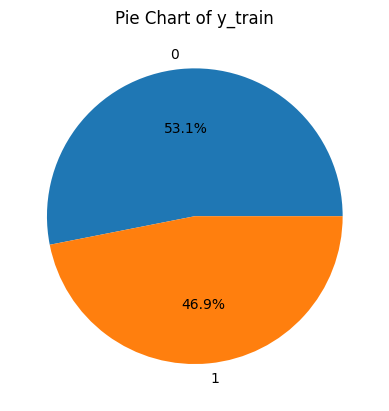

In [ ]:
# prompt: Using dataframe y_train: pie chart

import matplotlib.pyplot as plt

# Get values from y_train
values = y_train[0].value_counts()

# Create a pie chart
plt.pie(values, labels=['0', '1'], autopct='%1.1f%%')
plt.title('Pie Chart of y_train')
plt.show()


In [ ]:
#Initialise XGBClassifier and Train the Model
model = XGBClassifier(gamma=0,learning_rate=0.01,max_depth=5,min_child_weight=3,subsample=1.0)

#model = XGBClassifier()
model.fit(x_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=0, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.01, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=5, max_leaves=None,
              min_child_weight=3, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [ ]:
print(y_test)

[0. 1. 1. 0. 0. 1. 0. 0. 1. 0. 0. 1. 0. 1. 1. 1. 1. 0. 0. 0. 1. 0. 0. 0.
 1. 1. 0. 1. 1.]


In [ ]:
import pandas as pd

# Convert the NumPy array to a DataFrame
y_test = pd.DataFrame(data=y_test)

# Print the DataFrame
print(y_test)

      0
0   0.0
1   1.0
2   1.0
3   0.0
4   0.0
5   1.0
6   0.0
7   0.0
8   1.0
9   0.0
10  0.0
11  1.0
12  0.0
13  1.0
14  1.0
15  1.0
16  1.0
17  0.0
18  0.0
19  0.0
20  1.0
21  0.0
22  0.0
23  0.0
24  1.0
25  1.0
26  0.0
27  1.0
28  1.0


In [ ]:
#Predict on the test case and find accuracy
y_pred = model.predict(x_test)
print(accuracy_score(y_test, y_pred)*100)

89.65517241379311


In [ ]:
#Print Confusion Matrix
print(confusion_matrix(y_test,y_pred))

[[13  2]
 [ 1 13]]


In [ ]:
"""[[True Positives, False Negatives]
 [False Positives, True Negatives]]"""

'[[True Positives, False Negatives]\n [False Positives, True Negatives]]'

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

Accuracy: 0.896551724137931
Precision: 0.8666666666666667
Recall: 0.9285714285714286
F1 Score: 0.896551724137931


In [ ]:
# Evaluate the model's performance
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test,y_pred)
print("Mean squared error:", mse)

Mean squared error: 0.10344827586206896
